# About videogame and dataset

In this Kaggle Dataset, provided over 720,000 competitive matches from the popular game PlayerUnknown's Battlegrounds. The data was extracted from pubg.op.gg, a game tracker website. 

PlayerUnknown's Battlegrounds
PUBG is a first/third-person shooter battle royale style game that matches over 90 players on a large island where teams and players fight to the death until one remains. Players are airdropped from an airplane onto the island where they are to scavenge towns and buildings for weapons, ammo, armor and first-aid. Players will then decide to either fight or hide with the ultimate goal of being the last one standing. A bluezone (see below) will appear a few minutes into the game to corral players closer and closer together by dealing damage to anyone that stands within the bluezone and sparing whoever is within the safe zone.

In [76]:
import numpy as np
import pandas as pd
import matplotlib as plt
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from scipy.stats import f_oneway, kruskal

In [2]:
data = pd.read_csv("deaths\kill_match_stats_final_1.csv")

In [3]:
data.head()

killed_by killer_name  killer_placement  killer_position_x  \
0      SCAR-L   854545656               1.0           366716.6   
1         AKM     chane_e              57.0           436041.6   
2  Hit by Car      LY0629              42.0           265942.7   
3         SKS   Supramida               6.0           339174.6   
4        M416   scopionzy               3.0           289848.4   

   killer_position_y      map  \
0           302736.6  MIRAMAR   
1           276913.3  MIRAMAR   
2           404094.2  MIRAMAR   
3           258929.0  MIRAMAR   
4           290939.0  MIRAMAR   

                                            match_id  time   victim_name  \
0  2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...  1059   SmileyRiley   
1  2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...   109     bonesaw53   
2  2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...   624       Robi256   
3  2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...  1450  Senorbotches   
4  2U4GBNA0YmmZtkItUaRt5bERD2XnqEiYq0Lv_ysjwIZsUH...  1296   lukesteeler   

   victim_placement  victim_position_x  victim_position_y  
0              32.0           366591.3           302851.8  
1              85.0           434867.2           276258.3  
2              44.0           265409.5           403900.4  
3              14.0           331995.5           253868.1  
4              24.0           290196.1           291358.5

In [4]:
relevant_columns = ['killer_placement', 'killer_position_x', 'killer_position_y']

In [6]:
missing_values = data[relevant_columns].isnull().sum()
missing_values

killer_placement     925952
killer_position_x    925952
killer_position_y    925952
dtype: int64

In [7]:
data.dropna(subset=relevant_columns, inplace=True)

In [10]:
missing_values = data[relevant_columns].isnull().sum()
missing_values

killer_placement     0
killer_position_x    0
killer_position_y    0
dtype: int64

In [11]:
print(data.isnull().sum())

killed_by                 0
killer_name               0
killer_placement          0
killer_position_x         0
killer_position_y         0
map                  159128
match_id                  0
time                      0
victim_name               0
victim_placement     242829
victim_position_x         0
victim_position_y         0
dtype: int64


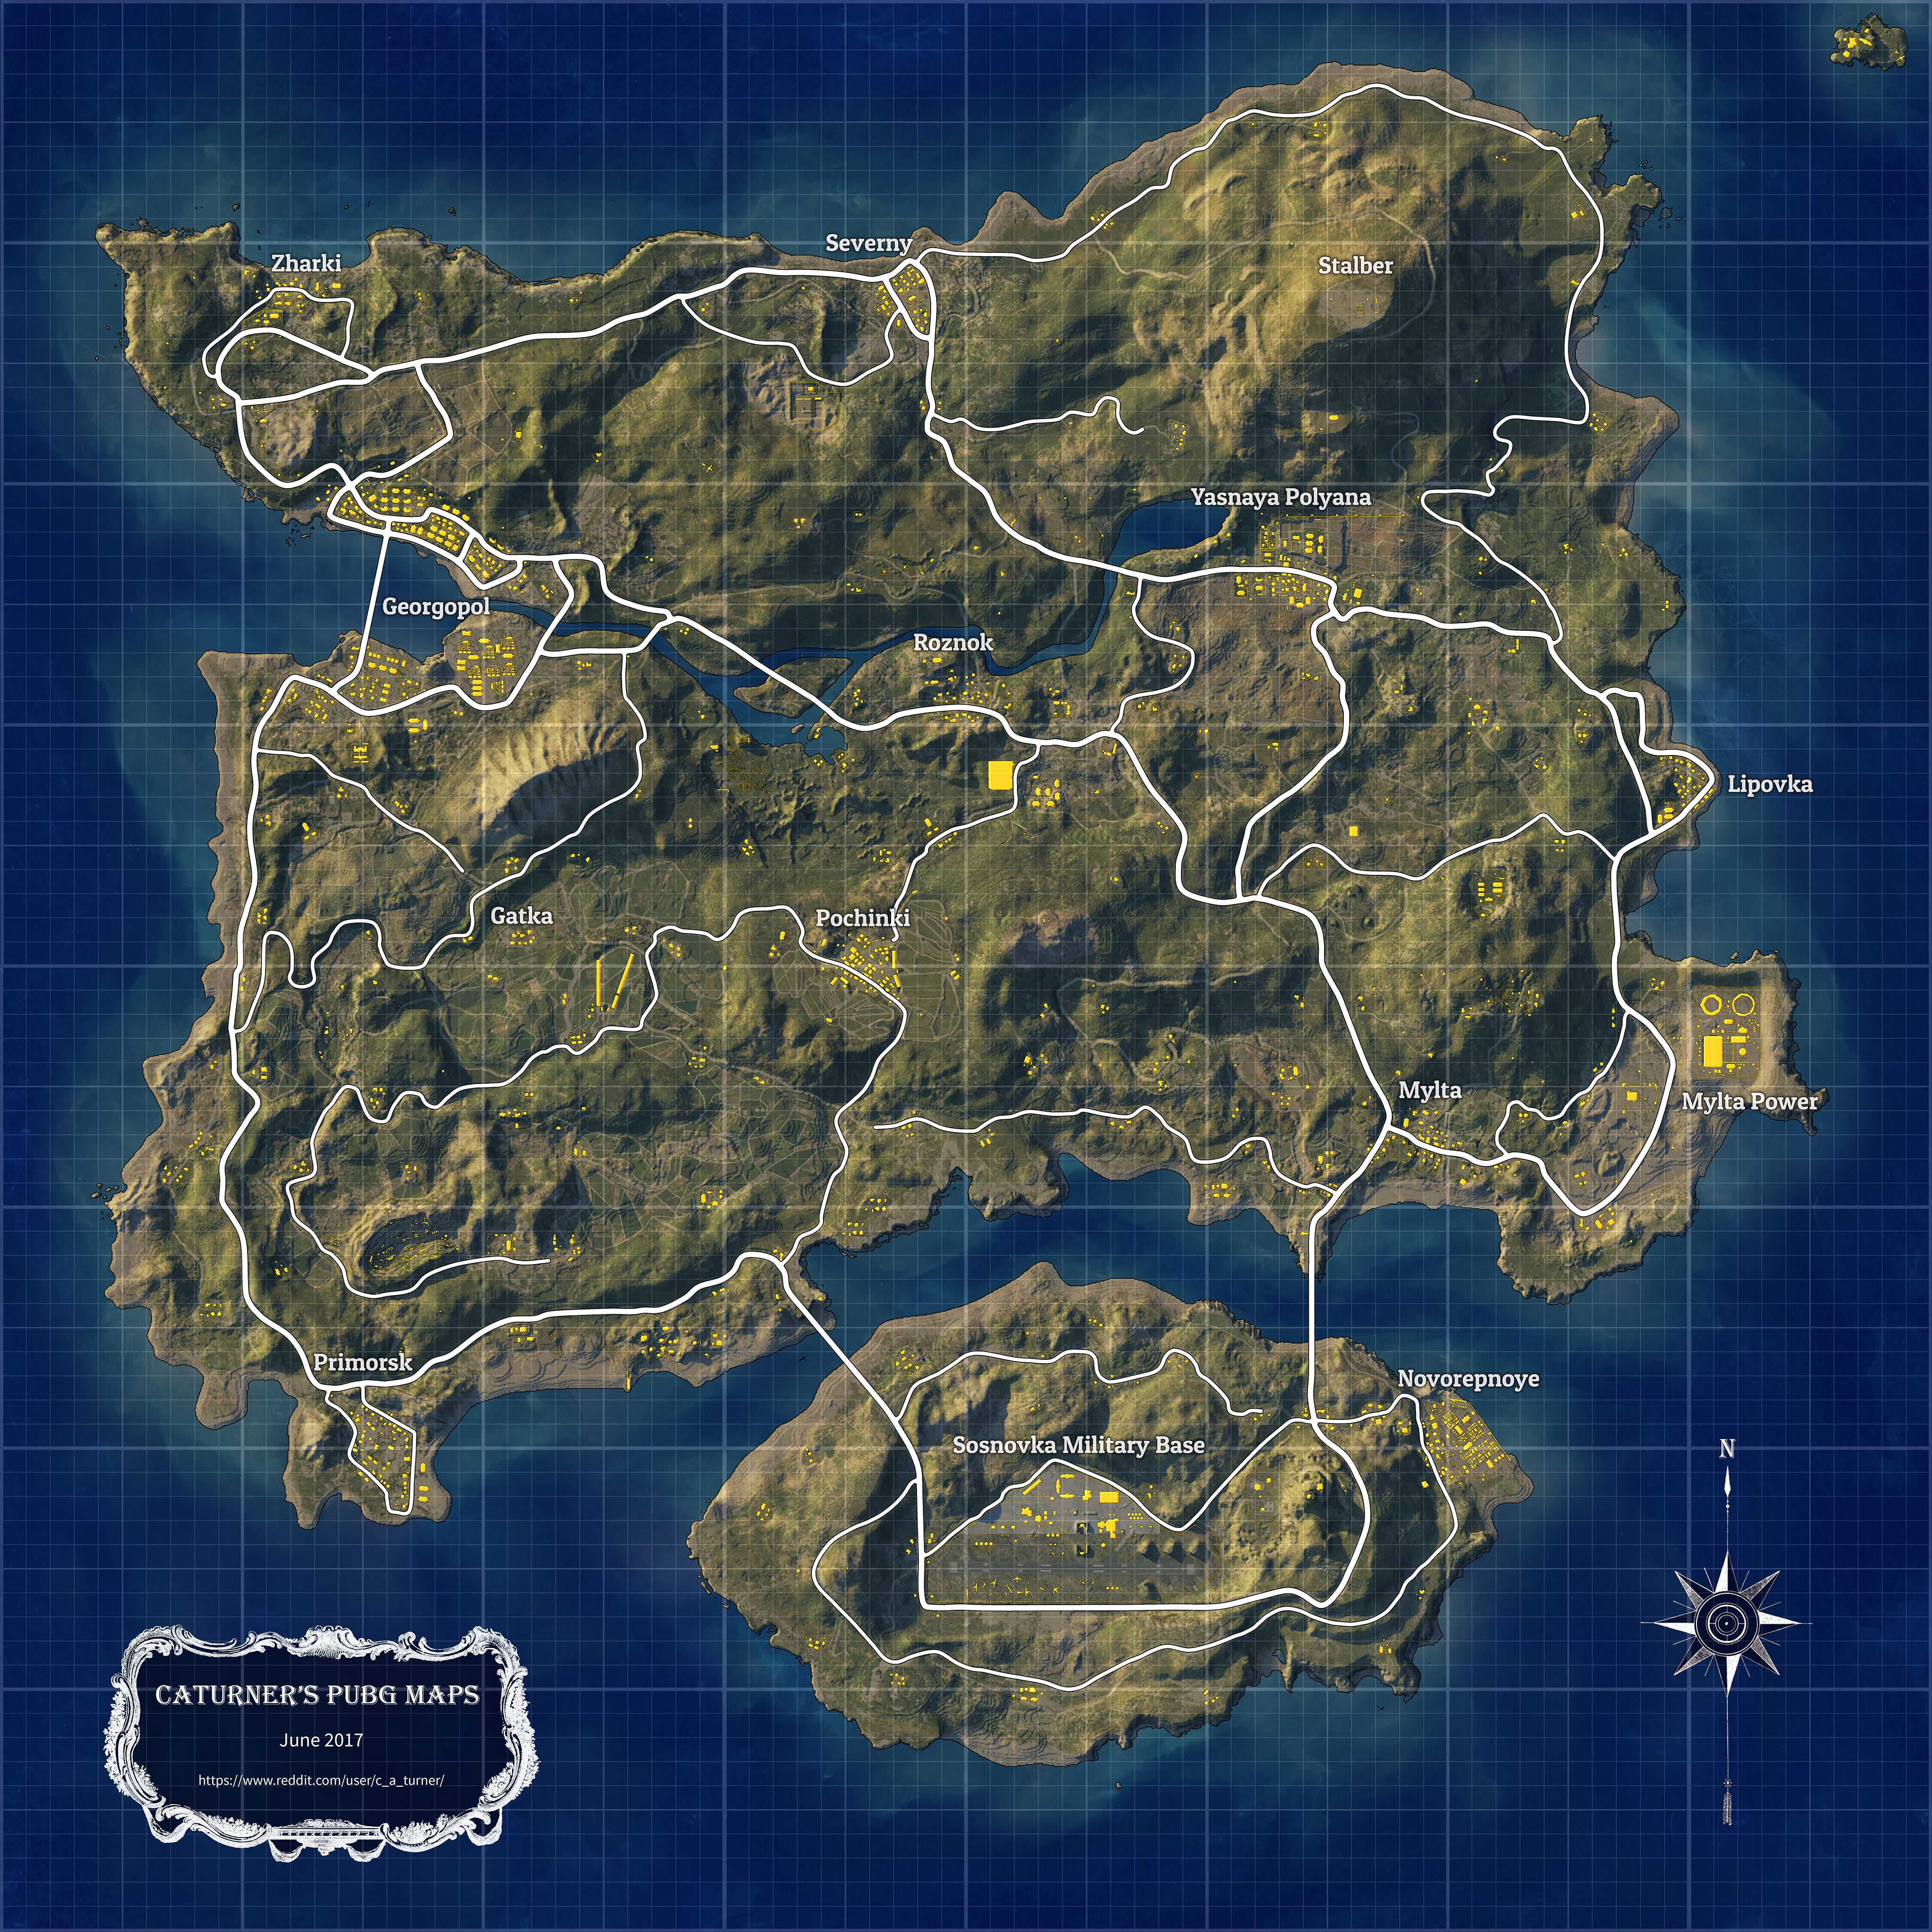

In [20]:
image_filename = 'erangel.jpg' 
Image(image_filename, width=700, height=700)

In [13]:
erangel_matches_data = data[data['map'] == 'ERANGEL']
erangel_matches_data.head()

killed_by     killer_name  killer_placement  \
94                     Down and Out    chuyingqifei              10.0   
95  death.ProjMolotov_DamageField_C  Smalleagle1010              20.0   
96                             UMP9  Smalleagle1010              20.0   
97                             M416         Levy2k6              22.0   
98                             UMP9        GeGeJBDA              20.0   

    killer_position_x  killer_position_y      map  \
94           165036.1           277311.0  ERANGEL   
95                0.0                0.0  ERANGEL   
96           386047.1           132479.5  ERANGEL   
97           392493.6           287693.0  ERANGEL   
98           376496.4           129218.9  ERANGEL   

                                             match_id  time    victim_name  \
94  2U4GBNA0YmnFQnfcWqyvMVZhdGWNXfTfs4JI8dtljeqjfs...   298          katy_   
95  2U4GBNA0YmnFQnfcWqyvMVZhdGWNXfTfs4JI8dtljeqjfs...   361  iamtheanomaly   
96  2U4GBNA0YmnFQnfcWqyvMVZhdGWNXfTfs4JI8dtljeqjfs...   255        Xailian   
97  2U4GBNA0YmnFQnfcWqyvMVZhdGWNXfTfs4JI8dtljeqjfs...   229        ididoda   
98  2U4GBNA0YmnFQnfcWqyvMVZhdGWNXfTfs4JI8dtljeqjfs...   290     CaptainWTF   

    victim_placement  victim_position_x  victim_position_y  
94              23.0           165294.8           277640.7  
95              18.0           379045.8           122588.9  
96              18.0           386011.9           132030.4  
97              19.0           387841.6           292552.5  
98              18.0           380301.1           131095.9

In [14]:
erangel_matches_data['match_id'].nunique()

119194

In [23]:
match_id_counts = erangel_matches_data['match_id'].value_counts()
print(match_id_counts)

2U4GBNA0Yml0pJLJ8bJvQDqDpdpfWVCvJNZ-ddVOPUGzoeelsTjPgJviHAjNtLRM    99
2U4GBNA0YmmpDoRj7N3C4pJEBQl6lVPsbYnXFTajlc-58FpNYfSw5p4SDtfjVz8Z    99
2U4GBNA0YmmyfT_9OEwyAtaoZeHbC6rFe_0z2nWF5mdjpNCk6S_bzr-17igXfKPW    99
2U4GBNA0Ymk5-xNIB0hGDLO_d5r2ntIlQgwk8XENT-fYY4MG1MZiqzaqa-uhswaQ    99
2U4GBNA0YmkeUwaL4vkQvCvImhavRMe1JKP1SBXZiD3sXlwrAktCOzv_LoWiBbi_    99
                                                                    ..
2U4GBNA0Ymn6E3EJUUekViZRc-ZsTAu4IRW2o8XrURHJNzB-VcnY0CW77lJ2CU8q    19
2U4GBNA0Ymki3HBbhZXdjps7RQg1dI6iwO3mUOsNO-XYuffgeTV90fHeA6gQ1Tsi    11
2U4GBNA0Ymm7-JdE2r4gfhdVQ_JiP2tcWbfNoJa1srZG3G8sVEynkbqilO5ARGeB     9
2U4GBNA0Ymmfs64WAYhJAkBmxdBAfeXoC9EDnwIcTtPKA0DFBkCc1CbA-t2Fw9xU     9
2U4GBNA0Ymlt9Ntu01Yt7xpST8NzOirvVlbR4hA_OkSntWa6imwgGE2ncafMQZPq     3
Name: match_id, Length: 119194, dtype: int64


In [36]:
matches_with_99_occurrences = erangel_matches_data[erangel_matches_data['match_id'].isin(match_ids_with_99_occurrences.index)]
grouped_matches = matches_with_99_occurrences.groupby('match_id')

In [45]:
final_data = pd.concat([group for _, group in grouped_matches])

In [46]:
final_data.head()

killed_by killer_name  killer_placement  killer_position_x  \
6030284           AKM   CFxiaohao               1.0           554031.8   
6030285          M416   CFxiaohao               1.0           552873.9   
6030286  Down and Out   CFxiaohao               1.0           551847.3   
6030287           AKM    woxndxTT              10.0           648774.1   
6030288        SCAR-L        KNDP               2.0           558331.1   

         killer_position_y      map  \
6030284           629407.7  ERANGEL   
6030285           628424.3  ERANGEL   
6030286           544173.7  ERANGEL   
6030287           245590.3  ERANGEL   
6030288           651610.3  ERANGEL   

                                                  match_id  time  \
6030284  2U4GBNA0Ymk5-xNIB0hGDLO_d5r2ntIlQgwk8XENT-fYY4...  1683   
6030285  2U4GBNA0Ymk5-xNIB0hGDLO_d5r2ntIlQgwk8XENT-fYY4...  1555   
6030286  2U4GBNA0Ymk5-xNIB0hGDLO_d5r2ntIlQgwk8XENT-fYY4...  1324   
6030287  2U4GBNA0Ymk5-xNIB0hGDLO_d5r2ntIlQgwk8XENT-fYY4...   152   
6030288  2U4GBNA0Ymk5-xNIB0hGDLO_d5r2ntIlQgwk8XENT-fYY4...  1729   

           victim_name  victim_placement  victim_position_x  victim_position_y  
6030284           Gnak               4.0           555123.0           629196.4  
6030285    ParmesanDon               7.0           552066.3           630609.4  
6030286   CB4Knowledge               9.0           551874.3           521726.3  
6030287  Sharks-Breath              43.0           648478.6           245007.3  
6030288     Da_Dabzter               3.0           551061.5           651164.4

In [47]:
final_data['match_id'].nunique()

11

In [48]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 6030284 to 9112596
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   killed_by          1089 non-null   object 
 1   killer_name        1089 non-null   object 
 2   killer_placement   1089 non-null   float64
 3   killer_position_x  1089 non-null   float64
 4   killer_position_y  1089 non-null   float64
 5   map                1089 non-null   object 
 6   match_id           1089 non-null   object 
 7   time               1089 non-null   int64  
 8   victim_name        1089 non-null   object 
 9   victim_placement   1063 non-null   float64
 10  victim_position_x  1089 non-null   float64
 11  victim_position_y  1089 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 110.6+ KB


# Hypotesis 1

### Positional Advantage: Players who have higher positions (killer_placement) tend to have higher positions on the map (killer_position_x and killer_position_y). This hypothesis suggests a positive correlation between player placement and their position on the map.

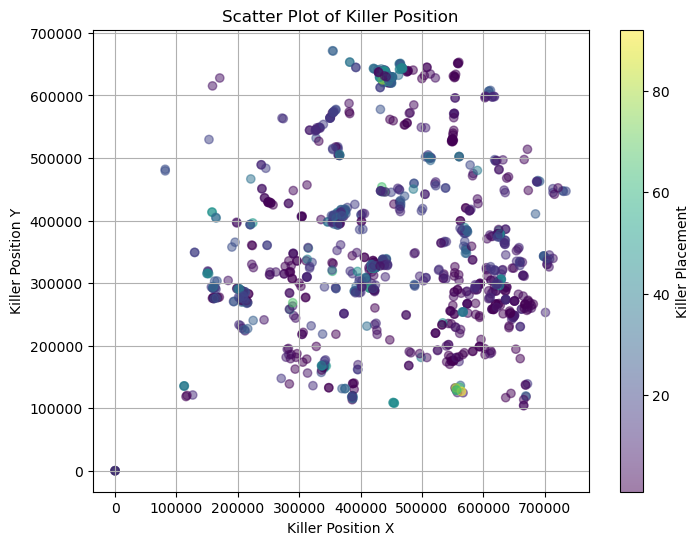

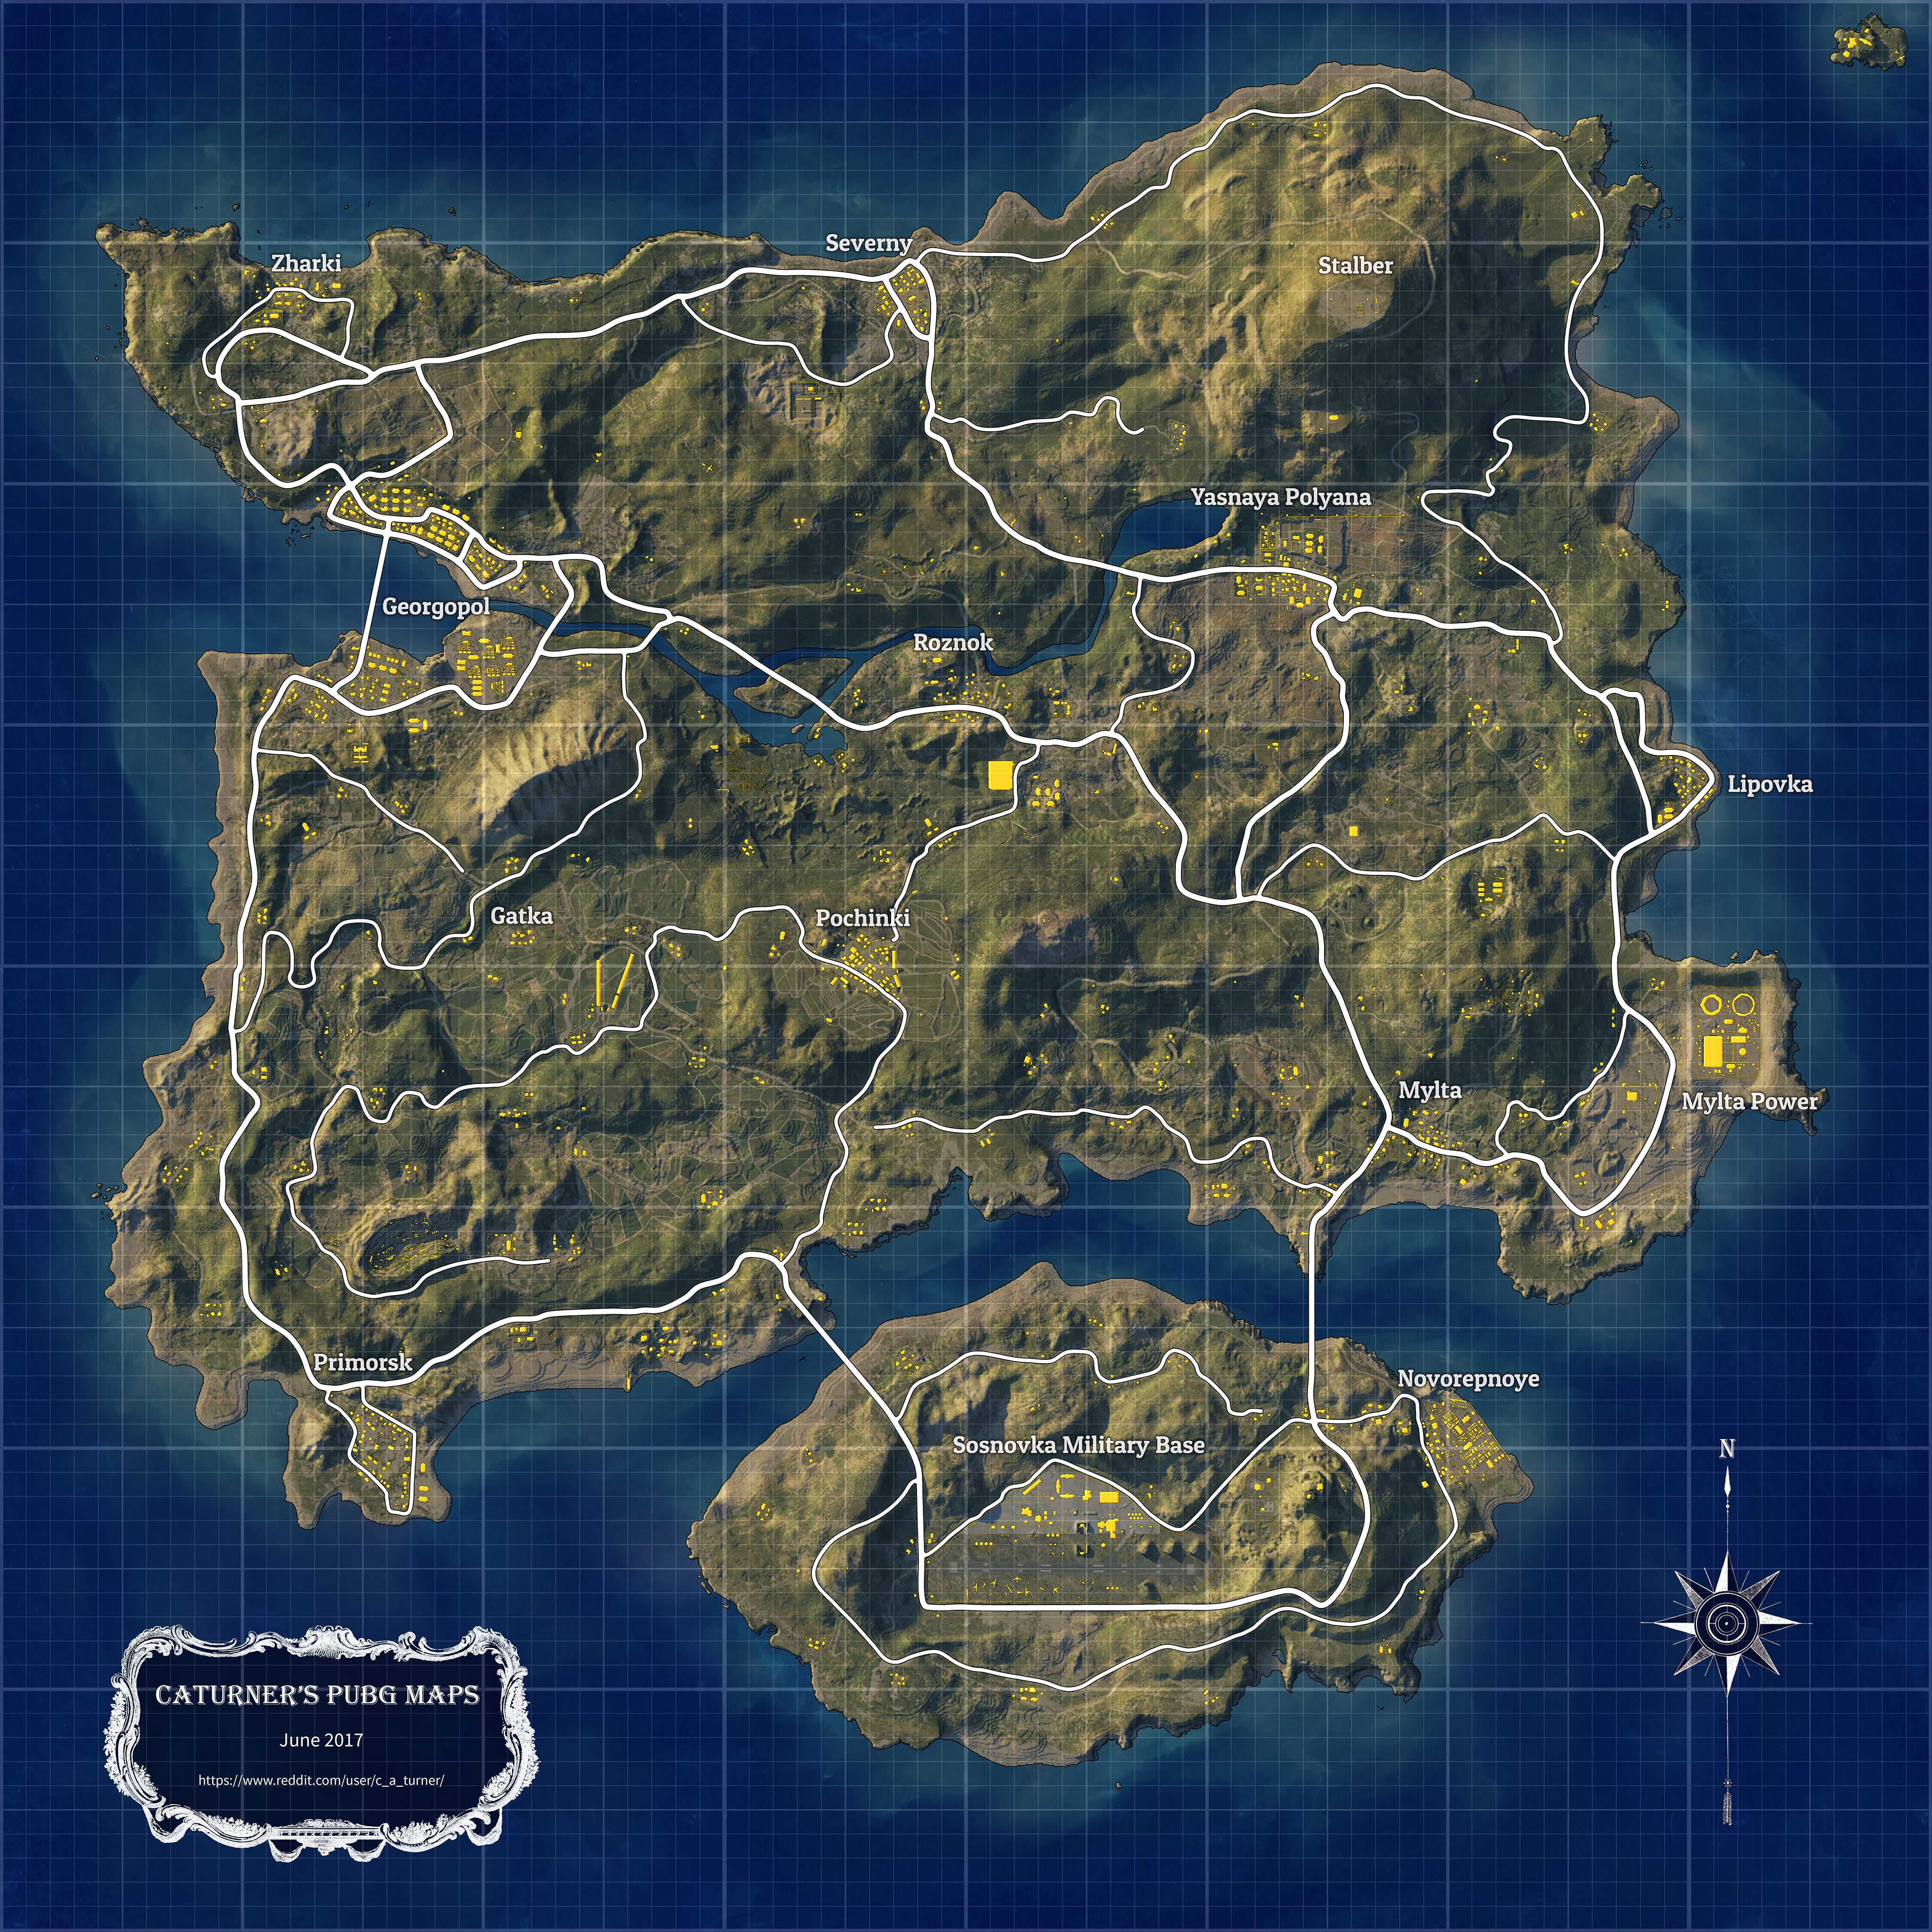

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(final_data['killer_position_x'], final_data['killer_position_y'], c=final_data['killer_placement'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Killer Placement')
plt.xlabel('Killer Position X')
plt.ylabel('Killer Position Y')
plt.title('Scatter Plot of Killer Position')
plt.grid(True)
plt.show()
Image(image_filename, width=600, height=600)

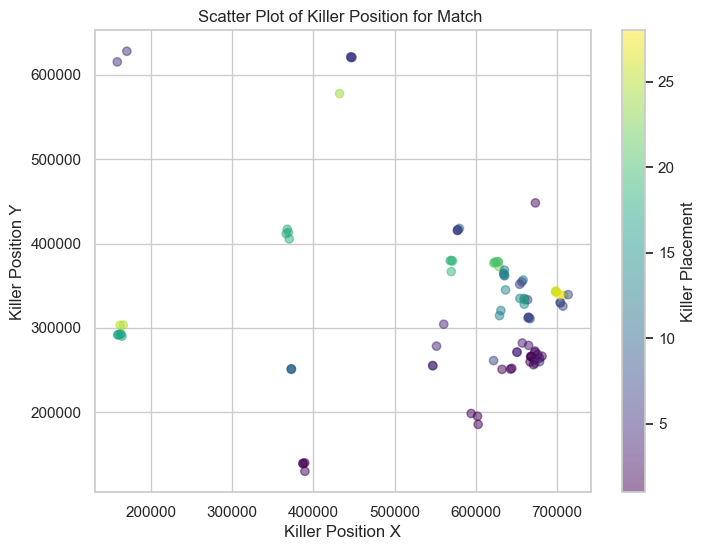

In [113]:
first_match_id = 'your_chosen_match_id' 
first_match_data = final_data[final_data['match_id'] == "2U4GBNA0Yml0pJLJ8bJvQDqDpdpfWVCvJNZ-ddVOPUGzoeelsTjPgJviHAjNtLRM"]

plt.figure(figsize=(8, 6))
plt.scatter(first_match_data['killer_position_x'], first_match_data['killer_position_y'], c=first_match_data['killer_placement'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Killer Placement')
plt.xlabel('Killer Position X')
plt.ylabel('Killer Position Y')
plt.title(f'Scatter Plot of Killer Position for Match {""}')
plt.grid(True)
plt.show()


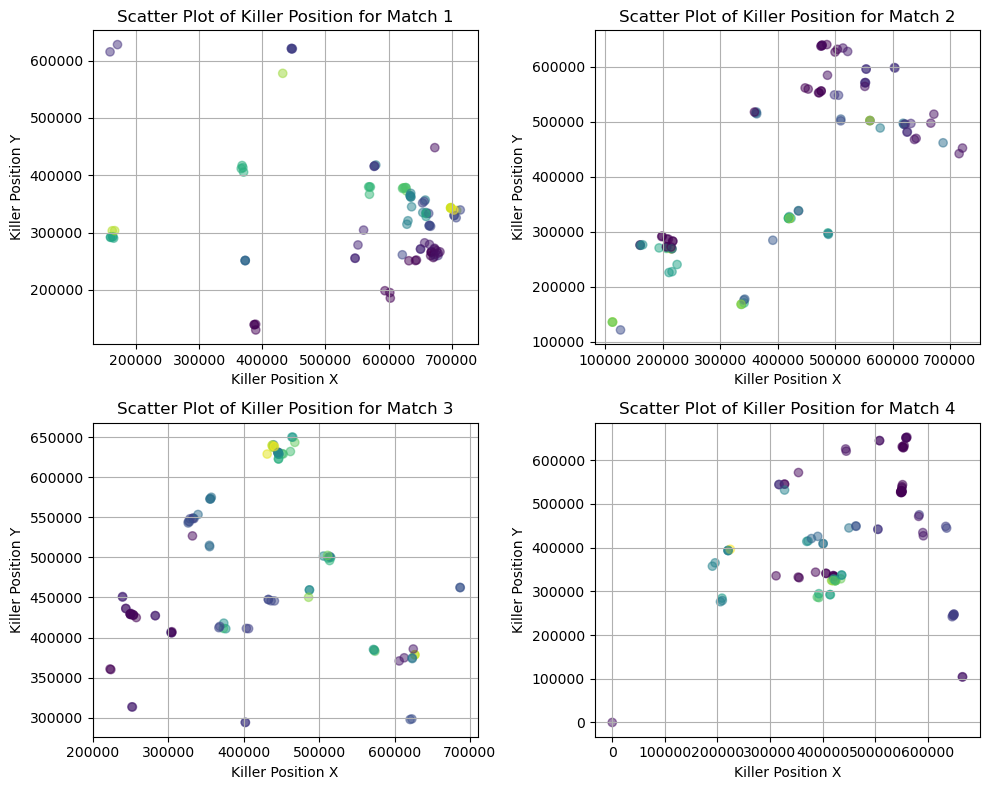

In [71]:
chosen_match_ids = ['2U4GBNA0Yml0pJLJ8bJvQDqDpdpfWVCvJNZ-ddVOPUGzoeelsTjPgJviHAjNtLRM', '2U4GBNA0YmmpDoRj7N3C4pJEBQl6lVPsbYnXFTajlc-58FpNYfSw5p4SDtfjVz8Z', '2U4GBNA0YmmyfT_9OEwyAtaoZeHbC6rFe_0z2nWF5mdjpNCk6S_bzr-17igXfKPW', '2U4GBNA0Ymk5-xNIB0hGDLO_d5r2ntIlQgwk8XENT-fYY4MG1MZiqzaqa-uhswaQ']  # Replace with actual match IDs

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()
match_num = 1

for i, match_id in enumerate(chosen_match_ids):
    chosen_match_data = final_data[final_data['match_id'] == match_id]

    axes[i].scatter(chosen_match_data['killer_position_x'], chosen_match_data['killer_position_y'],
                    c=chosen_match_data['killer_placement'], cmap='viridis', alpha=0.5)
    axes[i].set_xlabel('Killer Position X')
    axes[i].set_ylabel('Killer Position Y')
    axes[i].set_title(f'Scatter Plot of Killer Position for Match {match_num}')
    axes[i].grid(True)
    match_num += 1

plt.tight_layout()
plt.show()


### Այսինքն այստեղից կարող ենք ենթադրել, որ match-երը ըստ քարտեզում ունեցած դիրքի կենտրոնացված են և շատ ցրված չեն, և այն խաղացողները, որոնք գրվել են բարձր դիրքեր, եղել են հիմնականում այն մասերում, որտեղ որ եղել է հիմնական կենտրոնացումը

### Calculate Pearson correlation coefficient and p-value 

In [69]:
correlation_coef_x, p_value_x = pearsonr(final_data['killer_placement'], final_data['killer_position_x'])

correlation_coef_y, p_value_y = pearsonr(final_data['killer_placement'], final_data['killer_position_y'])

print("Correlation coefficient for killer_placement and killer_position_x:", correlation_coef_x)
print("P-value for killer_placement and killer_position_x:", p_value_x)
print("\nCorrelation coefficient for killer_placement and killer_position_y:", correlation_coef_y)
print("P-value for killer_placement and killer_position_y:", p_value_y)


Correlation coefficient for killer_placement and killer_position_x: -0.14031761415369565
P-value for killer_placement and killer_position_x: 3.3488071691156175e-06

Correlation coefficient for killer_placement and killer_position_y: 0.08416885618693112
P-value for killer_placement and killer_position_y: 0.005447360769315995


### Հարաբերակցություն «killer_placement»-ի և «killer_position_x»-ի միջև.
    - Հարաբերակցության գործակիցը մոտավորապես -0,140 է, ինչը ցույց է տալիս թույլ բացասական հարաբերակցություն «killer_placement» և «killer_position_x»-ի միջև:
    - Սրանից կարող ենք ենթադրել, որ երբ քարտեզի x առանցքի վրա դիրքը (`killer_position_x`) մեծանում է, խաղացողի դիրքը (`killer_placement`) փոքր-ինչ նվազում է: Այնուամենայնիվ, հարաբերակցությունը թույլ է, հետևաբար այն այնքան էլ ամուր չէ:
    
    - p-արժեքը մոտավորապես 3.35e-06 է, ինչը զգալիորեն տարբերվում է 0.05 նշանակալիության մակարդակից:
    - Կարող ենք ենթադրել, որ «killer_placement» և «killer_position_x»-ի միջև հարաբերակցությունը վիճակագրորեն նշանակալի է, ինչը նշանակում է, որ դա դժվար թե պատահականորեն տեղի ունենա, հետևաբար, կարող ենք եզրակացնել, որ կա էական բացասական հարաբերակցություն:

### Հարաբերակցություն «killer_placement»-ի և «killer_position_y»-ի միջև.
    - Հարաբերակցության գործակիցը մոտավորապես 0.084 է, ինչը ցույց է տալիս թույլ դրական հարաբերակցությունը «killer_placement» և «killer_position_y»-ի միջև:
    - Սա ենթադրում է, որ քանի որ քարտեզի y աառանցքի վրա դիրքը մեծանում է (`killer_position_y`), խաղացողի (`killer_placement`) փոքր-ինչ աճելու միտում ունի: Այնուամենայնիվ, հարաբերակցությունը այստեղ նույնպես թույլ է, հետևաբար այն այնքան էլ ամուր չէ:
    
    - p-արժեքը մոտավորապես 0,0054 է, որը փոքր է 0,05 բնորոշ նշանակության մակարդակից:
    - Հետևաբար, կարող ենք եզրակացնել, որ կա զգալի դրական հարաբերակցություն «killer_placement» և «killer_position_y»-ի միջև:

### Ամփոփելով, հիմնվելով Correlation coefficient և p-արժեքների վրա.

- «killer_placement» և «killer_position_x»-ի միջև զգալի բացասական հարաբերակցություն կա:
- Կա զգալի դրական հարաբերակցություն «killer_placement» և «killer_position_y» միջև:

Այս բացահայտումները խոսում են վիճակագրորեն նշանակալի կապի մասին խաղի մեջ խաղացողի զբաղեցրած դիրքի և քարտեզի վրա նրանց դիրքերի միջև համապատասխանաբար x առանցքի և y առանցքի ուղղություններով:

# Hypotesis 2

### Weapon Effectiveness: Certain weapons (killed_by) may be more effective in securing kills based on factors such as range, damage, and availability. This hypothesis suggests that the choice of weapon may influence player performance and match outcomes.

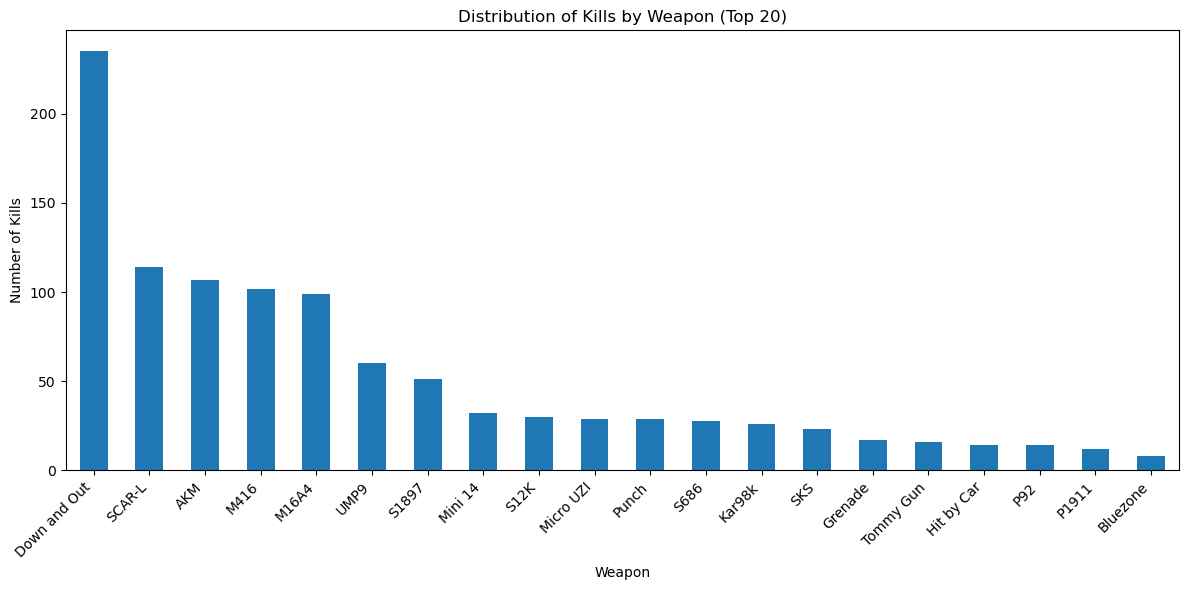

In [72]:
weapon_kills = final_data['killed_by'].value_counts()

plt.figure(figsize=(12, 6))
weapon_kills.head(20).plot(kind='bar')
plt.xlabel('Weapon')
plt.ylabel('Number of Kills')
plt.title('Distribution of Kills by Weapon (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


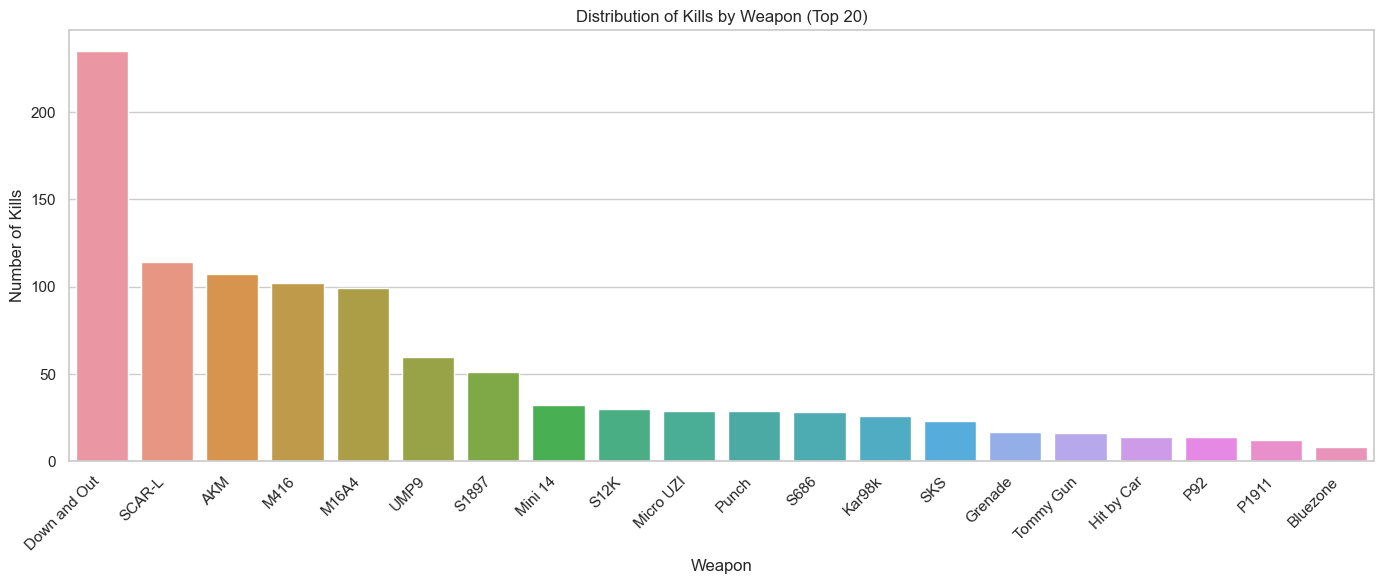

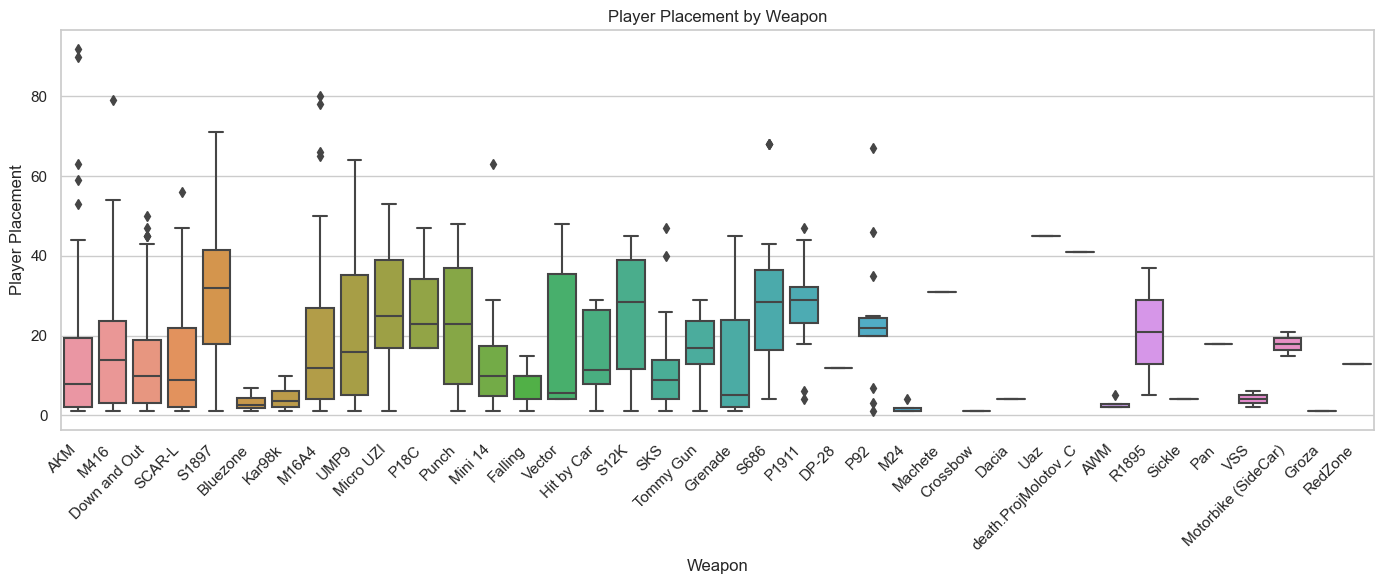

In [74]:
sns.set(style="whitegrid")

# Plot 1: Bar plot for distribution of kills by weapon
plt.figure(figsize=(14, 6))
sns.barplot(x=weapon_kills.head(20).index, y=weapon_kills.head(20).values)
plt.xlabel('Weapon')
plt.ylabel('Number of Kills')
plt.title('Distribution of Kills by Weapon (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 2: Box plot for player placement by weapon
plt.figure(figsize=(14, 6))
sns.boxplot(x='killed_by', y='killer_placement', data=final_data)
plt.xlabel('Weapon')
plt.ylabel('Player Placement')
plt.title('Player Placement by Weapon')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### ANOVA and Kruskal-Wallis tests

In [75]:
anova_results = f_oneway(*[final_data[final_data['killed_by'] == weapon]['killer_placement'] for weapon in weapon_kills.head(5).index])
print("ANOVA Results:")
print(anova_results)

kruskal_results = kruskal(*[final_data[final_data['killed_by'] == weapon]['killer_placement'] for weapon in weapon_kills.head(5).index])
print("\nKruskal-Wallis Results:")
print(kruskal_results)


ANOVA Results:
F_onewayResult(statistic=1.9912520999080952, pvalue=0.0942187901970662)

Kruskal-Wallis Results:
KruskalResult(statistic=9.847902099510886, pvalue=0.043069188719277125)


Ինչպես ANOVA-ի, այնպես էլ Կրուսկալ-Ուալիսի թեստերի արդյունքները պատկերացում են տալիս այն մասին, թե արդյոք տարբեր զենքերում խաղացողների տեղադրման հարցում զգալի տարբերություններ կան: Ահա թե ինչպես կարող ենք մեկնաբանել արդյունքները.

1. **ANOVA արդյունքները**:
    - ANOVA թեստը համեմատում է խաղացողների զբաղեցրած դիրքը տարբեր զենքերի դեպքում:
    - 0,094 p-value-ով մենք չենք կարողանում մերժել զրոյական վարկածը 0,05 նշանակության մակարդակում:
    - Սա խոսում է այն մասին, որ բավարար ապացույցներ չկան եզրակացնելու, որ կոնկրետ զենքերով խաղացողների զբաղեցրած դիրքերի զգալի տարբերություններ կան:

2. **Kruskal-Wallis արդյունքները**:
    - Kruskal-Wallis թեստը նույնպես համեմատում է խաղացողների զբաղեցրած դիրքը տարբեր զենքերի դեպքում:
    - 0,043 p-value-ով մենք մերժում ենք զրոյական վարկածը 0,05 նշանակության մակարդակով:
    - Սա ենթադրում է, որ կան փաստեր, որոնք հաստատում են այլընտրանքային վարկածը, որ կոնկրետ զենքերով խաղացողների զբաղեցրած դիրքերի միջինների զգալի տարբերություններ կան:

**Եզրակացություն**.
    - ANOVA թեստի արդյունքները ցույց են տալիս, որ տարբեր զենքերով խաղացողների զբաղեցրած դիրքերի էական տարբերություններ չկան:
    - Այնուամենայնիվ, Kruskal-Wallis թեստի արդյունքները ցույց են տալիս, որ կոնկրետ զենքերով խաղացողների զբաղեցրած դիրքերի միջինների զգալի տարբերություններ կան:
    - Հետևաբար, թեև ANOVA թեստը չի հայտնաբերել էական տարբերություններ, ոչ պարամետրիկ Կրուսկալ-Ուալիսի թեստը հայտնաբերել է մեդիանների զգալի տարբերություններ, ինչը ցույց է տալիս, որ զենքի ընտրությունը կարող է ազդեցություն ունենալ խաղացողի կատարողականի և խաղի արդյունքների վրա:

# Some visualizations

### Player Deaths by Map Location

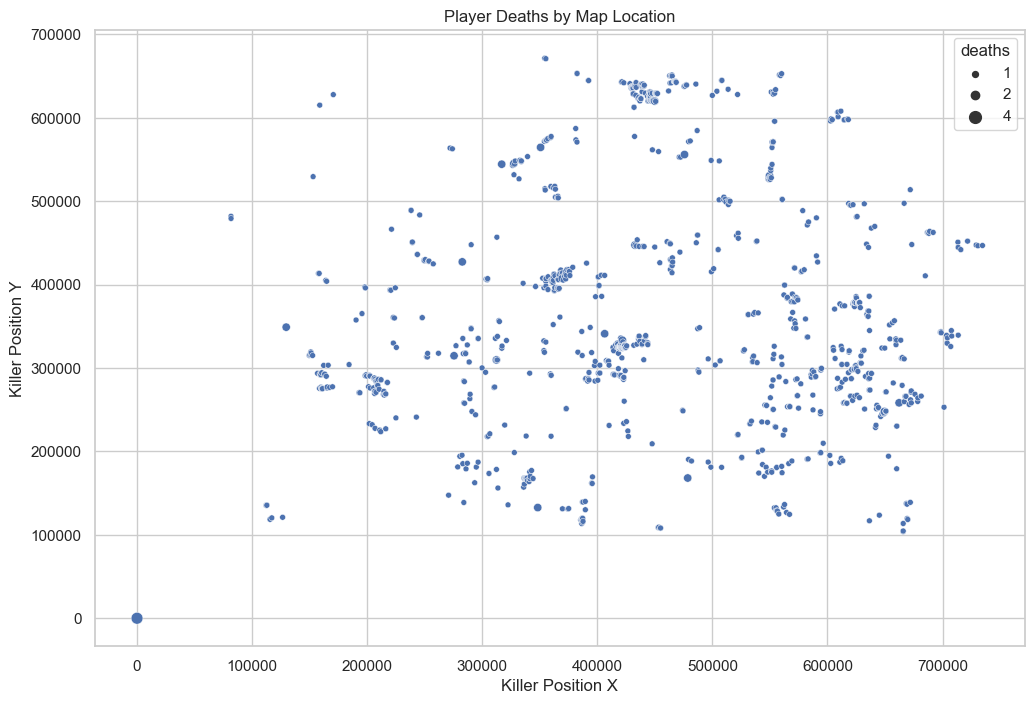

In [102]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='killer_position_x', y='killer_position_y', size='deaths', data=player_deaths_by_location)
plt.xlabel('Killer Position X')
plt.ylabel('Killer Position Y')
plt.title('Player Deaths by Map Location')
plt.show()


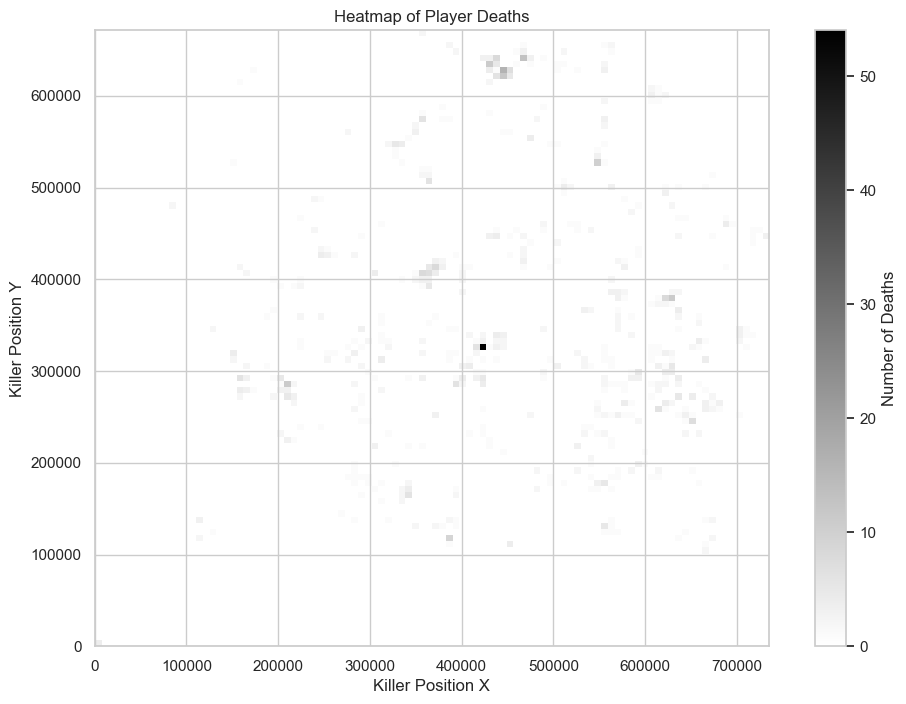

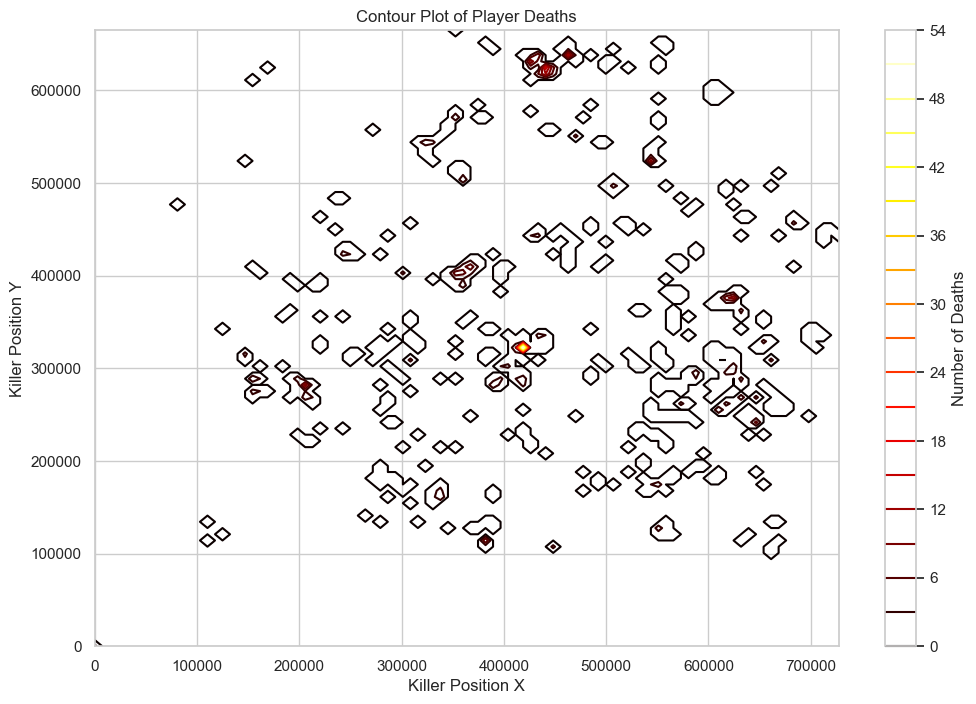

In [85]:
# A 2D grid of player deaths by map location
grid_size = 100  
x = final_data['killer_position_x']
y = final_data['killer_position_y']
heatmap, xedges, yedges = np.histogram2d(x, y, bins=grid_size)

# A heatmap of player deaths with 'inferno' colormap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='binary')
plt.colorbar(label='Number of Deaths')
plt.xlabel('Killer Position X')
plt.ylabel('Killer Position Y')
plt.title('Heatmap of Player Deaths')
plt.show()

# A contour plot of player deaths with 'magma' colormap
plt.figure(figsize=(12, 8))
plt.contour(xedges[:-1], yedges[:-1], heatmap.T, 20, cmap='hot')
plt.colorbar(label='Number of Deaths')
plt.xlabel('Killer Position X')
plt.ylabel('Killer Position Y')
plt.title('Contour Plot of Player Deaths')
plt.show()

